<h1 align=center><font size = 7>Stationary Business</font></h1>

## Introduction
Seeing the current scenario of India, there are numerous schools; nearly one in every street, incrementing the number of students. As we all would be familiar with the fact that there is a lot of homework and project work allotted to the students during school. To gain utter perfection in their work, the students require several stationary stuffs like pen, pencils, charts, project files, etc. This makes the business of a stationary shop much favorable to flourish and prosper. Taking the school students as the target audience, this project aims to find the schools around a given location so that a business person, aiming to start a stationary shop, can receive help to pursue a profitable business.

## Business Problem
For a business person to run a stationary shop business, it will be utterly problematic for his business to acquire profits if he sets his shop in a location where no students or schools are present. Hence, this project aims to colect data about a particular location where many schools are located, so that his shop can attract more and more students.

This idea can solve the problems faced by students and make the business profitable as students need a lot of stationary stuff to complete their homework as well as projects.

## Importing Libraries

In [35]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
!pip install folium
import folium

## Geopy 
Here we will use geopy library to find latitude and longitude of Delhi,India

In [6]:
#Lets find longitude and Latitude of Delhi 
adress='Delhi'
geolocator=Nominatim(user_agent='http')
location=geolocator.geocode(adress)
lat_delhi=location.latitude
lng_delhi=location.longitude
print('Latiude and Longitude of Delhi are {},{} '.format(lat_delhi,lng_delhi))

Latiude and Longitude of Delhi are 28.6517178,77.2219388 


## Using Foursquare 
Now we will use foursquare to first defining credentials and then passing the search query to find schools in delhi

In [7]:
#Now let's Define our foursquare Credentials
CLIENT_ID='LZTBBJJ0JN4TKNCEIU1USRHPFV4GQQRNMEPZPNIIMTIUBSKW'
CLIENT_SECRET='01J1GKBB1PBN54NGP44IMEVNIKGRTIBKERU2SDIKP4X20DCI'
VERSION='20190605'


In [84]:
#Let's Create API request for all Schools in Delhi 
search_query='School'
LIMIT=500
radius=10000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_delhi,lng_delhi, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=LZTBBJJ0JN4TKNCEIU1USRHPFV4GQQRNMEPZPNIIMTIUBSKW&client_secret=01J1GKBB1PBN54NGP44IMEVNIKGRTIBKERU2SDIKP4X20DCI&ll=28.6517178,77.2219388&v=20190605&query=School&radius=10000&limit=500'

## Gathering Data
In this we will Gather data from our foursquare result

In [85]:
results=requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee119ce237de16992115921'},
 'response': {'venues': [{'id': '5e9584d4b5458f0008e353dd',
    'name': 'Play School / Creche / Day Care in Greater Faridabad | Appleseeds.in',
    'location': {'address': 'House No 899, Sector 21',
     'lat': 28.651657793249687,
     'lng': 77.2222352027893,
     'labeledLatLngs': [{'label': 'display',
       'lat': 28.651657793249687,
       'lng': 77.2222352027893}],
     'distance': 29,
     'postalCode': '121001',
     'cc': 'IN',
     'city': 'Farīdābād',
     'state': 'Haryāna',
     'country': 'India',
     'formattedAddress': ['House No 899, Sector 21',
      'Farīdābād 121001',
      'Haryāna',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d13b941735',
      'name': 'School',
      'pluralName': 'Schools',
      'shortName': 'School',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1591810521'

## Converting Data
Here we will convert our data into dataframe and then filter it

In [86]:
#converting json into dataframe
venues=results['response']['venues']
dataframe=json_normalize(venues)
dataframe.head()
dataframe.shape


(50, 17)

In [87]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Play School / Creche / Day Care in Greater Far...,School,"House No 899, Sector 21",IN,Farīdābād,India,NaN,29,"[House No 899, Sector 21, Farīdābād 121001, Ha...","[{'label': 'display', 'lat': 28.65165779324968...",28.651658,77.222235,121001,Haryāna,5e9584d4b5458f0008e353dd
1,National School Of Drama | नेशनल स्कूल ऑफ ड्रामा,Theater,"Bahawalpur House, I Bhagwandas Road",IN,NaN,India,NaN,3226,"[Bahawalpur House, I Bhagwandas Road, India]","[{'label': 'display', 'lat': 28.62465842588491...",28.624658,77.233771,NaN,NaN,4d22a83186e154812825cc3a
2,Bal Bharati Public School,Student Center,Sir GangaRamHosp Marg,IN,New Delhi,India,NaN,3403,"[Sir GangaRamHosp Marg, New Delhi, Delhi, India]","[{'label': 'display', 'lat': 28.64045306227122...",28.640453,77.189547,NaN,Delhi,50744022e4b035a2189f57d8
3,Rajdhani Motor driving training school,Miscellaneous Shop,B-49/a A R.B Lane Adarsh Nagar,IN,New Delhi,India,Near metro station,1022,[B-49/a A R.B Lane Adarsh Nagar (Near metro st...,"[{'label': 'display', 'lat': 28.657149, 'lng':...",28.657149,77.230384,110033,Delhi,4d351d0e98336dcbd77b3ef0
4,Presentation Convent School,General College & University,NaN,IN,NaN,India,NaN,1620,[India],"[{'label': 'display', 'lat': 28.65999801505803...",28.659998,77.235584,NaN,NaN,4f043f25be7b46d0f9308db9
5,St Xavier's Se Sec School,Student Center,"4, Raj Niwas Marg, Delhi 54",IN,NaN,India,NaN,1856,"[4, Raj Niwas Marg, Delhi 54, India]","[{'label': 'display', 'lat': 28.66738345143211...",28.667383,77.228450,NaN,NaN,4dfcaab752b18923030cc9fc
6,British International School of Digital Marketing,Community College,"A-3, 2nd Floor, Milap Nagar",IN,New Delhi,India,NaN,1778,"[A-3, 2nd Floor, Milap Nagar, New Delhi 110059...","[{'label': 'display', 'lat': 28.66750785910836...",28.667508,77.219167,110059,Delhi,5c07b0429411f20039dad3cf
7,St. Andrews Scots Sr. Sec. School,High School,9th Avenue,IN,New Delhi,India,"I.P. Extension, Patparganj",7768,"[9th Avenue (I.P. Extension, Patparganj), New ...","[{'label': 'display', 'lat': 28.63584807177348...",28.635848,77.299372,110092,Delhi,4e873ada77c8dc447fadd17e
8,School Of Nursing,Medical School,Ganga Ram Hospial,IN,NaN,India,NaN,3459,"[Ganga Ram Hospial, India]","[{'label': 'display', 'lat': 28.638191, 'lng':...",28.638191,77.190058,NaN,NaN,52688d1e11d23a18969ffbf9
9,Raisina Bengali School,General College & University,NaN,IN,NaN,India,NaN,1880,[India],"[{'label': 'display', 'lat': 28.63875356819479...",28.638754,77.209603,NaN,NaN,4ed1f5b3e3007feb7f64c2ee


## Data Cleaning
we will clean the preprocessed data

In [88]:
#Data Cleaning 

#Now we will check  for null values
dataframe_filtered.isnull().sum()

name                 0
categories           1
address             18
cc                   0
city                20
country              0
crossStreet         38
distance             0
formattedAddress     0
labeledLatLngs       0
lat                  0
lng                  0
postalCode          35
state               19
id                   0
dtype: int64

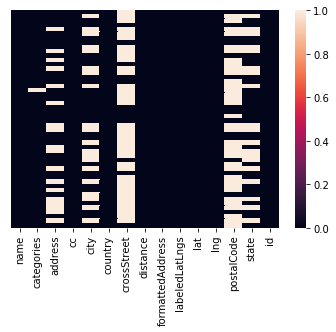

In [89]:
import seaborn as sns
sns.heatmap(dataframe_filtered.isnull(),yticklabels=False)

In [90]:
df=dataframe_filtered.drop({'name','categories','address','cc','city','country','crossStreet','formattedAddress','labeledLatLngs','state','id','postalCode'},axis=1)

In [91]:
df.head()

,distance,lat,lng
0,29,28.651658,77.222235
1,3226,28.624658,77.233771
2,3403,28.640453,77.189547
3,1022,28.657149,77.230384
4,1620,28.659998,77.235584


In [92]:
df.isnull().sum()

distance    0
lat         0
lng         0
dtype: int64

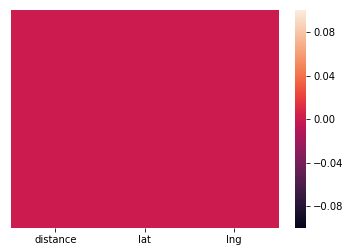

In [93]:
sns.heatmap(df.isnull(),yticklabels=False)

## KMeans 
### using Preprocessing

In [94]:
from sklearn.preprocessing import StandardScaler
X=df.values[:,0:]
X=np.nan_to_num(X)
cluster_dataset=StandardScaler().fit_transform(X)
cluster_dataset

array([[-1.75406523e+00,  1.71712938e-01,  2.52628454e-01],
       [-3.98351649e-01, -7.29147478e-01,  5.95440380e-01],
       [-3.23293375e-01, -2.02143919e-01, -7.18773191e-01],
       [-1.33297559e+00,  3.54932445e-01,  4.94786268e-01],
       [-1.07938887e+00,  4.49992631e-01,  6.49319815e-01],
       [-9.79311175e-01,  6.96414971e-01,  4.37300292e-01],
       [-1.01238770e+00,  7.00565956e-01,  1.61443408e-01],
       [ 1.52772000e+00, -3.55793951e-01,  2.54491358e+00],
       [-2.99546124e-01, -2.77619849e-01, -7.03581512e-01],
       [-9.69133782e-01, -2.58849208e-01, -1.22753077e-01],
       [ 1.10196572e+00, -7.02678827e-02,  2.28649176e+00],
       [-2.88096557e-01, -5.94941638e-01,  9.62404653e-01],
       [-8.27498394e-01,  8.37482012e-01,  2.30272798e-01],
       [-9.11461887e-01,  7.47349764e-01,  5.05171042e-02],
       [-8.13080420e-01, -2.33274416e-01, -3.01448403e-01],
       [-8.82201882e-01,  1.21859397e-01, -3.88500901e-01],
       [-7.93149692e-01,  3.03477802e-03

### Checking the appropriate value of k 

In [39]:
#check the value of k for KMeans with elbow method
wcss=[]

for i in range(1,15):
    kmeans=KMeans(i)
    kmeans.fit(X)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [95]:
wcss

[1826109608.4005778,
 363976105.16160136,
 231038170.11861742,
 109396218.09610654,
 61246196.6632894,
 39607780.32382316,
 23606409.556545924,
 15358646.194045004,
 7165323.38089012,
 4996915.18852249,
 2877594.427851704,
 1962957.963388314,
 1376357.1265296056,
 788710.0911672504]

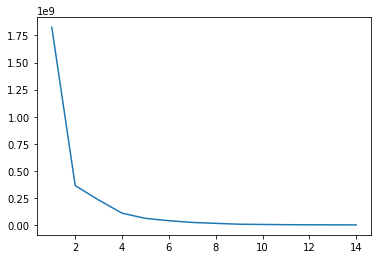

In [96]:
num_clusters=range(1,15)
plt.plot(num_clusters,wcss)
#therefor according to elbow method the best value of k is 4

### Using Kmeans

In [97]:
#fitting our model to find clusters
kmeans=KMeans(init='k-means++',n_clusters=4,n_init=12)
kmeans.fit(cluster_dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [98]:
labels=kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 0, 1, 1], dtype=int32)

In [101]:
df['Labels']=labels
df.head()

,distance,lat,lng,Labels
0,29,28.651658,77.222235,0
1,3226,28.624658,77.233771,0
2,3403,28.640453,77.189547,0
3,1022,28.657149,77.230384,0
4,1620,28.659998,77.235584,0


## Visualizing clusters

In [102]:
#color codes
#now we will assign color codes to each labels
y=0
colorcode=[]
for x in df['Labels']:
    if x==0 :
        colorcode.append('Red')
    if x==1 :
        colorcode.append('Blue')
    if x==2 :
        colorcode.append('Green')
    if x==3 :
        colorcode.append('Yellow')

In [109]:
#map of delhi
%matplotlib inline
delhi_map=folium.Map(location=[df['lat'].mean(),df['lng'].mean()],zoom_start=11)
i=0
delhi=folium.map.FeatureGroup()
for lat, lon in zip(df['lat'], df['lng']):
    delhi.add_child(folium.CircleMarker(
        [lat, lon],
        radius=5,
        color=colorcode[i],
        fill=True,
        fill_color=colorcode[i],
        fill_opacity=0.7))
    i=i+1
delhi_map.add_child(delhi)
delhi_map

## Defining each Cluster

In [110]:
#cluster 1 data
cluster1=df.loc[df['Labels']==0,df.columns[[1]+[0]+list(range(5,df.shape[1]))]]
cluster1

,lat,distance
0,28.651658,29
1,28.624658,3226
2,28.640453,3403
3,28.657149,1022
4,28.659998,1620
5,28.667383,1856
6,28.667508,1778
8,28.638191,3459
9,28.638754,1880
11,28.628681,3486


In [111]:
cluster2=df.loc[df['Labels']==1,df.columns[[1]+[0]+list(range(5,df.shape[1]))]]
cluster2

,lat,distance
17,28.691773,4594
34,28.679472,4119
37,28.687312,4513
38,28.648127,5252
39,28.672990,4831
40,28.685036,3928
41,28.680867,5158
44,28.690568,5221
45,28.647053,5294
46,28.670119,6100


In [112]:
cluster3=df.loc[df['Labels']==2,df.columns[[1]+[0]+list(range(5,df.shape[1]))]]
cluster3

,lat,distance
25,28.571874,9941
31,28.535111,13097


In [113]:
cluster4=df.loc[df['Labels']==3,df.columns[[1]+[0]+list(range(5,df.shape[1]))]]
cluster4

,lat,distance
7,28.635848,7768
10,28.644405,6764
22,28.679143,9835
42,28.641223,5130
43,28.650994,5388


So a stationary shop owner should open his shop in cluster 1